In [161]:
import os
import geopandas as gpd
import numpy as np
import shapely
from shapely.geometry import Polygon, Point
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
import json
from shapely.plotting import plot_polygon, plot_line

In [162]:
S_U = "U"

In [163]:
boundary_path = os.path.join(S_U + "_boundaries.gpkg")
road_path = os.path.join(S_U + "_road_segments.gpkg")
intersection_path = os.path.join(S_U + "_intersections.gpkg")
lane_group_path = os.path.join(S_U + "_lane_groups_polygons.gpkg")
lane_path = os.path.join(S_U + "_lanes_polygons.gpkg")
road_segment_path= os.path.join(S_U + "_road_segments.gpkg")

In [107]:

boundary_df = gpd.read_file(boundary_path)
road_df = gpd.read_file(road_path)
road_polygon = unary_union(road_df.geometry)
intersection_df = gpd.read_file(intersection_path)
intersection_polygon = unary_union(intersection_df.geometry)
lane_group_df = gpd.read_file(lane_group_path)
lane_group_polygons = [Polygon(geom) for geom in lane_group_df.geometry]
lane_df = gpd.read_file(lane_path)
lane_polygons = [Polygon(geom) for geom in lane_df.geometry]
road_segment_df = gpd.read_file(road_segment_path)

In [164]:
lane = lane_df.geometry[0]

In [165]:
len(boundary_df)

500

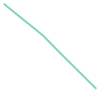

In [206]:
boundary_df.geometry[0]

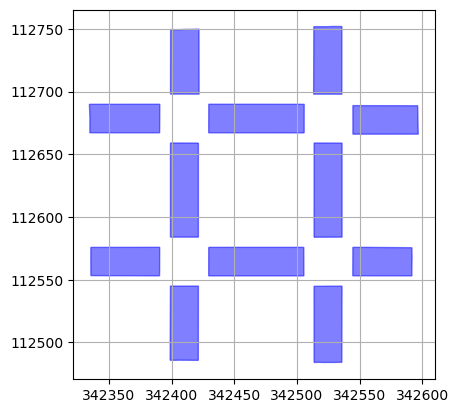

In [167]:
#plot each road segment
for i, row in road_segment_df.iterrows():
    road_segment_polygon = row.geometry
    plot_polygon(road_segment_polygon, color='blue', alpha=0.5, add_points=False) # random color

plt.show()

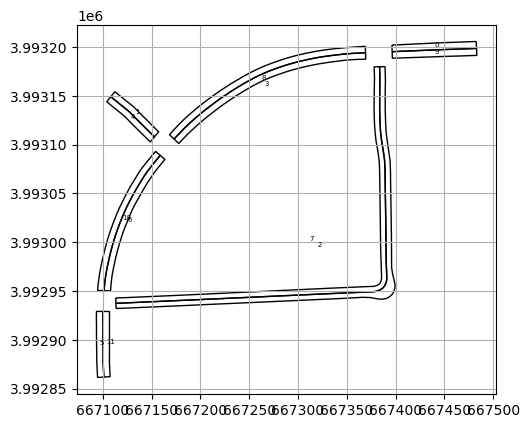

In [94]:
#plot each lane polygon
for i, lane in enumerate(lane_polygons):
    plot_polygon(lane, edgecolor='black', facecolor='none', linewidth=1, add_points=False)
    plt.text(lane.centroid.x, lane.centroid.y, str(i), fontsize=5)
    #print(lane.exterior.coords[0] == (lane.exterior.coords[-1]))

In [8]:
lane.exterior.coords.xy

(array('d', [667106.81442902, 667106.782460145, 667106.7904930871, 667106.7818722881, 667106.7974593173, 667106.7944968058, 667106.7778574158, 667106.6808630307, 667106.658812795, 667106.6815103042, 667106.7803957516, 667106.9217354794, 667107.3436891579, 667107.4307138252, 667101.0044430697, 667100.6081484881, 667100.2664387935, 667100.2495005575, 667100.235321902, 667100.2292229523, 667100.2813292539, 667100.24650873, 667100.1479832552, 667100.1381110231, 667100.0744566291, 667100.1430365931, 667106.81442902]),
 array('d', [3992928.894419425, 3992919.4838836435, 3992916.6869973806, 3992914.961239604, 3992909.7885143203, 3992897.8671857123, 3992878.941674936, 3992878.879673335, 3992878.649924599, 3992877.657855153, 3992875.6409008135, 3992872.9818845433, 3992863.9889311036, 3992862.1342049222, 3992861.719311439, 3992869.646714421, 3992877.1352099567, 3992877.5758263045, 3992878.0165414596, 3992878.457062031, 3992878.8713653, 3992886.367523717, 3992900.036554917, 3992913.706292714, 399

True
True
True
True
True
True


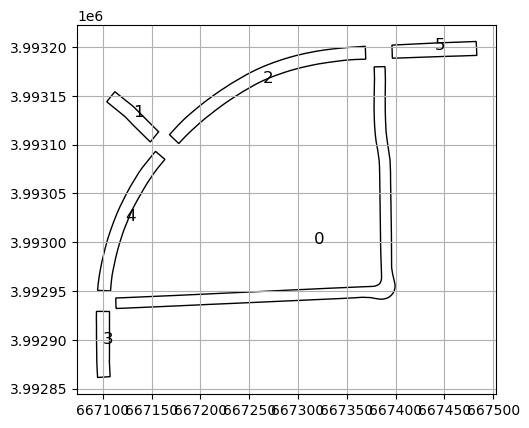

In [9]:
#plot each lane polygon
road_polygons = [Polygon(geom) for geom in road_segment_df.geometry]
for i, lane in enumerate(road_polygons):
    plot_polygon(lane, edgecolor='black', facecolor='none', linewidth=1, add_points=False)
    plt.text(lane.centroid.x, lane.centroid.y, str(i), fontsize=12)
    print(road_polygons[i].exterior.coords[0] == (road_polygons[i].exterior.coords[-1]))

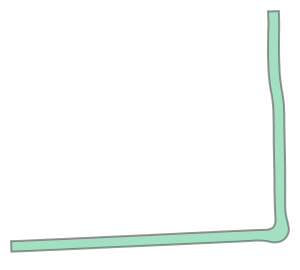

In [10]:
road = road_polygons[0]
road

In [11]:
b = boundary_df.geometry[2]

In [12]:
road.contains(b)

True

In [28]:
boundary_polygon.coords[1]

(667148.6803091483, 3993102.558196474)

In [ ]:
S_main_lane_boundaries = {0: (7, 0, -1), 1: (11, 0, 1), 2: (14, 1, -1), 3: (15, 1, 1), 4: (6, 2, -1), 5: (8, 2, 1), 6: (16, 3, 1), 7: (9, 3, -1), 8: (17, 4, 1), 9: (12, 4, -1), 10: (10, 5, -1), 11: (13, 5, 1)}



In [96]:
main_lanes = boundary_df.geometry[0:18]
connecting_lanes = boundary_df.geometry[18:]

In [136]:
a = {1:"a", 4:"d"}
b = {2:"b", 3:"c"}
a.update(b)
a

{1: 'a', 4: 'd', 2: 'b', 3: 'c'}

In [148]:
len(boundary_df)

126

In [149]:
126 - 108

18

In [153]:
num = 0
for i, row in boundary_df.iterrows():
    if i > 17:
        continue
    
    bound = row.geometry
    for j, row2 in boundary_df.iterrows():
        if j <= 17:
            continue
        
        bound2 = row2.geometry
        if bound.intersects(bound2):
            num += 1

print(num)

216


6


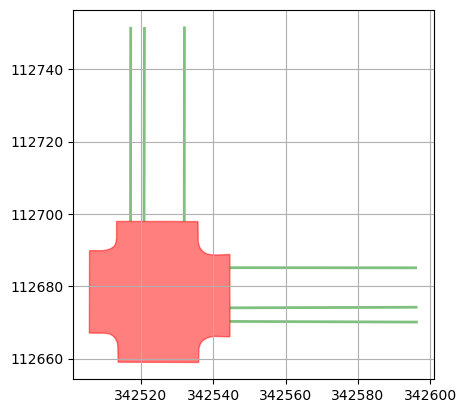

In [114]:
num = 0
for i, row in intersection_df.iterrows():
    if i != 1:
        continue
    intersection_polygon = row.geometry
    plot_polygon(intersection_polygon, color='red', alpha=0.5, add_points=False)  # random color
    for j, boundary in boundary_df.iterrows():
        if j > 18:
            continue
        boundary_polygon = boundary.geometry
        if intersection_polygon.intersects(boundary_polygon):
            num += 1
            plot_line(boundary_polygon, color='green', alpha=0.5, add_points=False)
print(num)

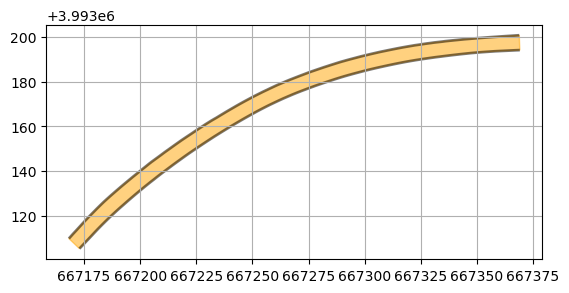

In [164]:
for i, row in lane_group_df.iterrows():
    lane_group_polygon = row.geometry
    if i == 0 :
        plot_polygon(lane_group_polygon, color='orange', alpha=0.5, add_points=False)  # random color
        for j, boundary in boundary_df.iterrows():
            if j > 17:
                continue
            boundary_polygon = boundary.geometry
            if lane_group_polygon.intersects(boundary_polygon):
                plot_line(boundary_polygon, color='black', alpha=0.5, add_points=False)


In [165]:
footprint = [
    [342552.7557, 112668.3227],
    [342552.7654, 112668.5168],
    [342552.791, 112668.7338],
    [342552.8176, 112668.8731],
    [342552.85, 112668.9762],
    [342552.8951, 112669.0525],
    [342552.9599, 112669.1114],
    [342553.2227, 112669.2523],
    [342553.2882, 112669.2718],
    [342555.3163, 112669.2629],
    [342555.2887, 112669.3785],
    [342555.3391, 112669.3775],
    [342555.4063, 112669.2626],
    [342556.552, 112669.2592],
    [342556.6167, 112669.2392],
    [342556.8156, 112669.107],
    [342556.8671, 112669.0591],
    [342556.9121, 112668.9967],
    [342556.9335, 112668.9623],
    [342556.9498, 112668.9278],
    [342556.988, 112668.844],
    [342557.0379, 112668.7135],
    [342557.0603, 112668.6187],
    [342557.0858, 112668.4712],
    [342557.0983, 112668.3062],
    [342557.0845, 112668.1411],
    [342557.0579, 112667.9939],
    [342557.0348, 112667.8992],
    [342556.9839, 112667.769],
    [342556.945, 112667.6856],
    [342556.9285, 112667.6512],
    [342556.9068, 112667.6169],
    [342556.8613, 112667.555],
    [342556.8095, 112667.5074],
    [342556.6096, 112667.3767],
    [342556.5447, 112667.3572],
    [342555.399, 112667.3626],
    [342555.3309, 112667.2482],
    [342555.2805, 112667.2475],
    [342555.309, 112667.3629],
    [342553.2809, 112667.3695],
    [342553.2156, 112667.3895],
    [342552.9538, 112667.5325],
    [342552.8895, 112667.5918],
    [342552.845, 112667.6684],
    [342552.8134, 112667.7718],
    [342552.7878, 112667.9113],
    [342552.764, 112668.1285],
    [342552.7557, 112668.3227]
  ]

0 7
1 14
2 9
3 5
4 15
6 8
10 12
11 13
16 17
18 20
19 23
21 22


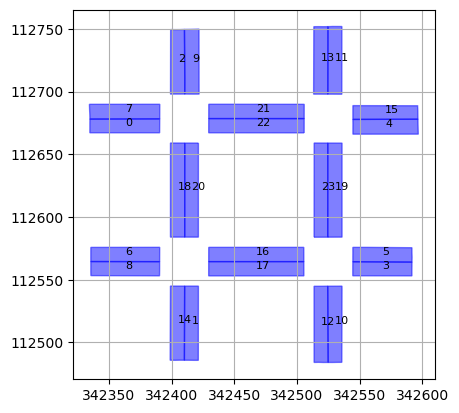

In [171]:
for i, row in lane_group_df.iterrows():
    lane_group_polygon = row.geometry
    plot_polygon(lane_group_polygon, color='blue', alpha=0.5, add_points=False)  # random color

    for j, row2 in lane_group_df[i+1:].iterrows():
        if i == j:
            continue
        lane_group_polygon2 = row2.geometry
        if lane_group_polygon.intersects(lane_group_polygon2):
            print(i, j)
            plt.text(lane_group_polygon.centroid.x, lane_group_polygon.centroid.y, str(i), fontsize=8)
            plt.text(lane_group_polygon2.centroid.x, lane_group_polygon2.centroid.y, str(j), fontsize=8)

In [49]:
125 - 90 + 1

36

In [ ]:

U_max = 83
U_connecting_lane_max = 307

134.87436880955204 84
126.26602475957111 86
129.34912086089022 88
143.76730381553 90
125.13655023967307 92
139.65483461376925 94
126.11788294521534 96
137.22429380253737 98
137.95128769871292 100
132.55020983448736 102
129.8836301509284 104
140.38707338988388 106
125.24527851649208 108
134.7217184281064 110
126.75834913701581 112
137.36819594915127 114
140.40087640860247 116
126.15495182338134 118
133.0652272360905 120
124.10672671694 122
128.58234628591663 124
136.72980027953884 126
124.91066689913552 128
138.38806609070852 130
127.45705986215087 132
137.8690556806591 134
125.09486479666329 136
135.04699766996129 138
134.45698051160358 140
124.62732879080608 142
125.74488481925418 144
138.64248162280373 146
70.32855751885891 148
70.75440110385676 150
72.19548553840627 152
78.76887718806903 154
151.3883038776151 156
69.5924524017979 158
146.37525858816088 160
141.4244892991348 162
152.48140523819228 164
140.54423701229004 166
158.12804909732176 168
151.9922502204862 170
145.62161856217

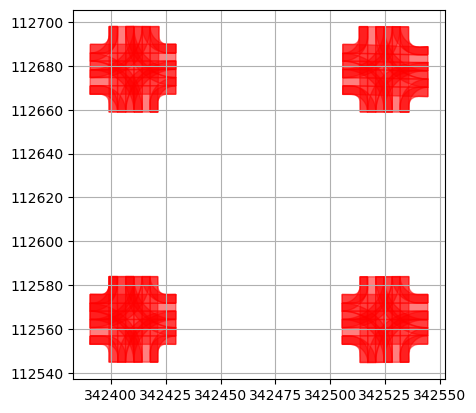

In [ ]:
for i in range(84, 308, 2):
    boundary = boundary_df.geometry[i]
    boundary_2 = boundary_df.geometry[i+1]
    
    points = list(boundary.coords[:]) + list(boundary_2.coords[::-1])
    polygon = Polygon(points)
    plot_polygon(polygon, color='red', alpha=0.5, add_points=False)  # random color
    print(polygon.area, i)
    

In [280]:



U_main_lane_boundaries = {0: (60, 7, -1), 1: (7, 27, -1), 2: (27, 30, -1), 3: (12, 30, 1), 4: (8, 12, -1), 5: (79, 8, -1), 6: (61, 20, -1), 7: (20, 58, -1), 8: (58, 33, -1), 9: (6, 33, 1), 10: (0, 6, -1), 11: (76, 0, -1), 12: (77, 16, -1), 13: (16, 25, -1), 14: (25, 36, 1), 15: (4, 36, -1), 16: (10, 4, -1), 17: (62, 10, -1), 18: (63, 14, -1), 19: (14, 26, -1), 20: (26, 31, -1), 21: (9, 31, 1), 22: (28, 9, -1), 23: (81, 28, -1), 24: (83, 18, -1), 25: (18, 21, -1), 26: (21, 32, 1), 27: (2, 32, -1), 28: (5, 2, -1), 29: (64, 5, 1), 30: (65, 11, -1), 31: (11, 29, -1), 32: (29, 59, -1), 33: (15, 59, 1), 34: (19, 15, -1), 35: (80, 19, -1), 36: (66, 22, -1), 37: (22, 23, -1), 38: (23, 34, -1), 39: (17, 34, 1), 40: (1, 17, -1), 41: (82, 1, -1), 42: (78, 24, -1), 43: (24, 13, -1), 44: (13, 35, 1), 45: (3, 35, -1), 46: (57, 3, -1), 47: (67, 57, -1), 48: (74, 50 ,-1), 49: (50, 39, -1), 50: (39, 52, 1), 51: (54, 52, -1), 52: (43, 54, -1), 53: (68, 43, -1), 54: (69, 51, -1), 55: (51, 38, -1), 56: (38, 41, -1), 57: (46, 41, 1), 58: (56, 46, -1), 59: (72, 56, -1), 60: (70, 48, -1), 61: (48, 45, -1), 62: (45, 55, -1), 63: (49, 55, 1), 64: (37, 49, -1), 65: (75, 37, -1), 66: (71, 44, -1), 67: (44, 47, -1), 68: (47, 53, -1), 69: (40, 53, 1), 70: (42, 40, -1), 71: (73, 42, -1)}
    







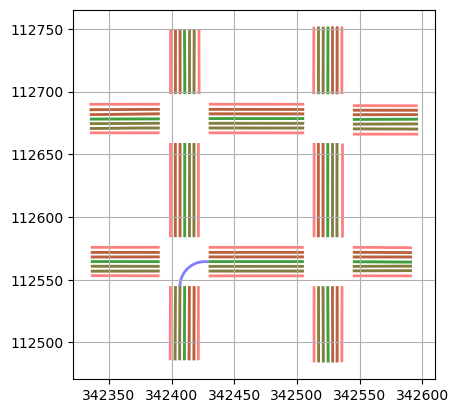

In [ ]:
for key, boundary in U_main_lane_boundaries.items():

    plot_line(boundary_df.geometry[boundary[0]], color='red', alpha=0.5, add_points=False)  # random color
    plot_line(boundary_df.geometry[boundary[1]], color='green', alpha=0.5, add_points=False)  # random color
    

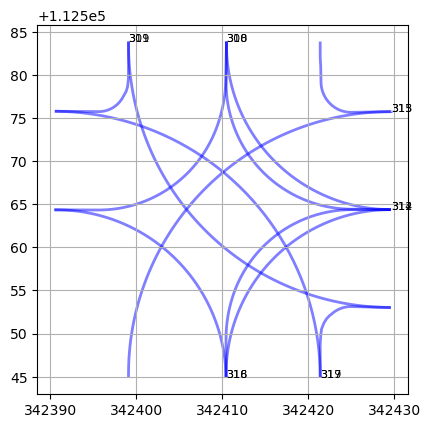

In [348]:


for i, row in boundary_df.iterrows():
    if 307 < i < 320:
        boundary = row.geometry
        plot_line(boundary, color='blue', alpha=0.5, add_points=False)  # random color
        plt.text(boundary.coords[0][0], boundary.coords[0][1], str(i), fontsize=8)


    



In [89]:
shapely.equals(boundary_df.geometry[91], boundary_df.geometry[94])

False

In [86]:
boundary_df.geometry[91].coords.xy

(array('d', [667094.6045101413, 667094.5961794744, 667094.5829424899, 667094.5693548898, 667094.5554166982, 667094.5411279465, 667094.5264886506, 667094.511498844, 667094.4961585449, 667094.4804677896, 667094.4644265999, 667094.448035006, 667094.431293041, 667094.4142007297, 667094.3967581085, 667094.3789652046, 667094.3608220537, 667094.3423286877, 667094.3234851407, 667094.3042494528, 667094.2842544898, 667094.2639632928, 667094.2439344502, 667094.2242750935, 667094.2049852588, 667094.1860649856, 667094.1675143056, 667094.1493332519, 667094.1315218563, 667094.1140801562, 667094.0970081823, 667094.0803059624, 667094.0639735332, 667094.0480109149, 667094.0324181456, 667094.0171952446, 667094.0023422418, 667093.9878591691, 667093.973746047, 667093.9600029017, 667093.9466297551, 667093.933626632, 667093.9210678125, 667093.9199476402, 667093.9078954883, 667093.8958573396, 667093.8838191868, 667093.8717810338, 667093.8597428817, 667093.8477047347, 667093.8356665799, 667093.8236284289, 6670

In [88]:
boundary_df.geometry[94].coords.xy

(array('d', [667093.4396425178, 667093.4381303943, 667093.4353589234, 667093.4363087345, 667093.4410579979, 667093.4496063266, 667093.4615124181, 667093.474490823, 667093.4865601852, 667093.4985983343, 667093.5106364863, 667093.5226746368, 667093.534712791, 667093.5467509418, 667093.5587890936, 667093.5708272442, 667093.5828653978, 667093.5949035505, 667093.6069417002, 667093.6189798506, 667093.6310180016, 667093.6430561541, 667093.6550943054, 667093.6671324577, 667093.6791706089, 667093.6912087607, 667093.7032469141, 667093.7152850643, 667093.7273232148, 667093.739361369, 667093.7513995179, 667093.7634376694, 667093.7754758241, 667093.7875139763, 667093.7995521245, 667093.811590278, 667093.8236284289, 667093.8356665799, 667093.8477047347, 667093.8597428817, 667093.8717810338, 667093.8838191868, 667093.8958573396, 667093.9078954883, 667093.9199476402, 667093.9210678125, 667093.933626632, 667093.9466297551, 667093.9600029017, 667093.973746047, 667093.9878591691, 667094.0023422418, 66709

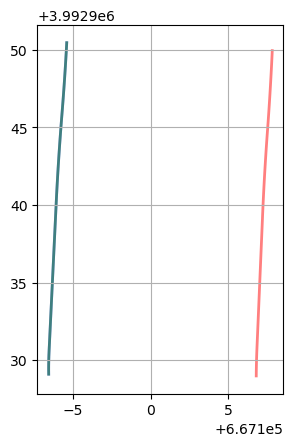

In [83]:
plot_line(boundary_df.geometry[90], color='red', alpha=0.5, add_points=False)
plot_line(boundary_df.geometry[91], color='blue', alpha=0.5, add_points=False)

plot_line(boundary_df.geometry[94], color='green', alpha=0.5, add_points=False)

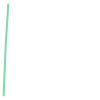

In [78]:
boundary_df.geometry[90]

In [160]:
a = [(1,2,3), (4,5,6), (7,8,9)]
# append all tuples
a = [item for sublist in a for item in sublist]
#
a


[1, 2, 3, 4, 5, 6, 7, 8, 9]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


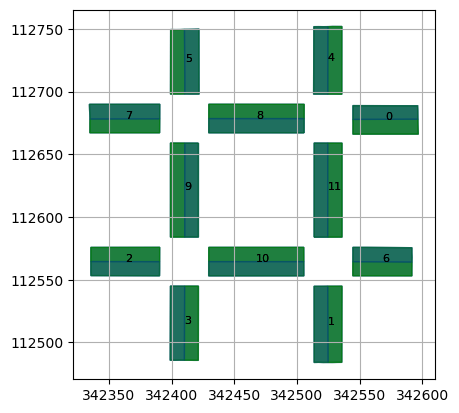

In [155]:
for lane in lane_group_df.geometry:
    plot_polygon(lane, color='blue', alpha=0.5, add_points=False)
    c = 0
    for road in road_df.geometry:
        if road.contains(lane):
            plot_polygon(road, color='green', alpha=0.5, add_points=False)
            plt.text(road.centroid.x, road.centroid.y, str(road_df.index[road_df.geometry == road][0]), fontsize=8)
            c += 1
    print(c)

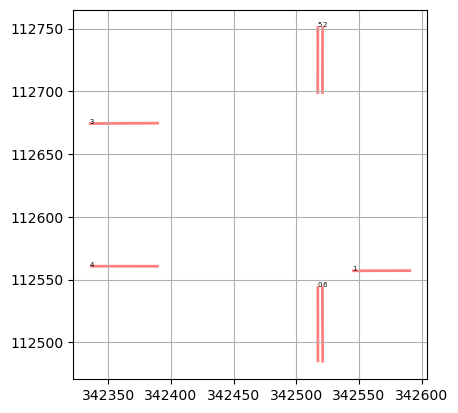

In [153]:
j = 84

for i, row in boundary_df.iterrows():
    boundary_polygon = row.geometry
    previous_lanes = []
    next_lanes = []

    if i < 7:
        plot_line(boundary_polygon, color='red', alpha=0.5, add_points=False)
        plt.text(boundary_polygon.coords[0][0], boundary_polygon.coords[0][1], str(i), fontsize=5)
        
        
    #elif 500 >=i >= 490:
    #    plot_line(boundary_polygon, color='blue', alpha=0.5, add_points=False)
    #    intersections = 0
    #    overlaps = 0
        '''
        for lane in main_lanes:
            start_point = shapely.Point(boundary_polygon.coords[0])
            end_point = shapely.Point(boundary_polygon.coords[-1])
            if start_point.intersects(lane):
                #plot_line(lane, color='black', alpha=0.5, add_points=False)
                previous_lanes.append(lane)
                
            if end_point.intersects(lane):
                #plot_line(lane, color='purple', alpha=0.5, add_points=False)
                next_lanes.append(lane)
        assert len(previous_lanes) == len(next_lanes) == 1
        '''
        
        #for boundary in connecting_boundaries:
        #    if shapely.equals(boundary_polygon, boundary):
        #        overlaps += 1
        #        plot_line(boundary, color='green', alpha=0.5, add_points=False)
        
        #print(overlaps)

In [14]:
boundary_0 = boundary_df.geometry[6]
boundary_1 = boundary_df.geometry[2]
boundary_2 = boundary_df.geometry[8]

In [15]:

lane_poly = shapely.Polygon(list(boundary_0.coords) + list(boundary_1.coords[::-1]))

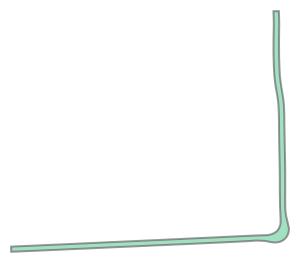

In [16]:
lane_poly

In [17]:
from rulebook_benchmark.roads import Network, Lane, MultiLinePlaceholder, ElementOrientation

/Users/ekin/Scenic/src/scenic/core/errors.py:271: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn("unable to install sys.excepthook to format Scenic backtraces")


In [18]:
lane_object = Lane(lane_poly, ElementOrientation(lane_poly), "lane_0", None, MultiLinePlaceholder(boundary_0), MultiLinePlaceholder(boundary_1))

In [24]:
tuple([lane_object])

(<rulebook_benchmark.roads.Lane at 0x103003910>,)

In [25]:
network = Network({lane_object.uid: lane_object}, {}, (lane_object,), {}, {}, {})

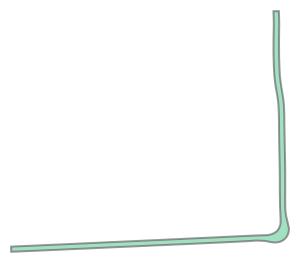

In [21]:
network._rtree.geometries[0]

In [ ]:
lane_poly.exterior.coords.xy

(array('d', [667113.484859361, 667116.7721423478, 667119.2124591622, 667123.0496591319, 667127.8604882503, 667130.8436404362, 667142.00032602, 667149.38959968, 667153.213436174, 667155.7417265036, 667158.4499148459, 667162.1708903704, 667166.1584298892, 667167.4670176673, 667169.0358235448, 667171.0441999484, 667174.7227355386, 667177.5560694104, 667182.483164649, 667185.5865311546, 667191.7647572837, 667197.9969313352, 667199.2351132813, 667202.6167578864, 667207.6537339955, 667210.7909394997, 667214.3763462005, 667219.2425016073, 667224.9870022128, 667236.1072112315, 667246.8172449406, 667262.7482155709, 667269.9896408797, 667278.9689741195, 667282.8958108326, 667287.943563253, 667291.5629729236, 667297.3874085122, 667300.5568447979, 667305.5742252897, 667317.2726203244, 667332.2276195367, 667344.9463853977, 667354.512150163, 667356.4592525037, 667357.7184450319, 667359.1071124936, 667360.4349949743, 667361.8413775396, 667362.6943636085, 667363.4459249668, 667364.1524796627, 667365.5

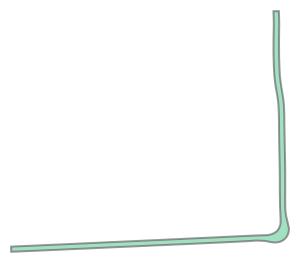

In [26]:
network.laneAt((667116.7721423478, 3992932.1154364846)).polygon

In [ ]:
network.laneAt((0, 0, 0))

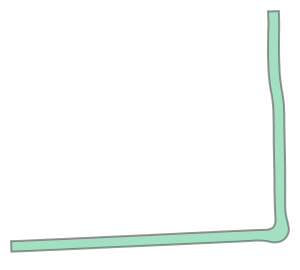

In [ ]:
road

In [ ]:
len(boundary_df) - len(boundary_df[:18])

108

In [ ]:
line1 = boundary_df.geometry[11]
line2 = boundary_df.geometry[7]

In [ ]:
len(line2.coords)
len(line1.coords)

12

In [ ]:
list(line1.coords) + list(line2.coords)

[(667157.1479394881, 3993113.0565209505),
 (667151.8341414974, 3993118.297081568),
 (667132.2362106727, 3993137.9028064907),
 (667131.8712634643, 3993138.2786359293),
 (667131.3551281884, 3993138.7419624804),
 (667130.508811356, 3993139.4382348354),
 (667129.4317622306, 3993140.345432234),
 (667127.2326375714, 3993142.1031250074),
 (667123.0086265969, 3993145.4676678795),
 (667122.6914409456, 3993145.7055249256),
 (667113.8333862387, 3993152.8184382273),
 (667112.3028276521, 3993154.0749442424),
 (667103.9411025206, 3993143.8779462455),
 (667106.9327036372, 3993141.407531309),
 (667120.4711183857, 3993130.405323864),
 (667122.6780575847, 3993128.5926211844),
 (667131.0762068196, 3993119.8581488486),
 (667140.0194868175, 3993111.051368332),
 (667146.115116123, 3993105.0473888796),
 (667146.5957476869, 3993104.5760918213),
 (667148.6543666467, 3993102.5770474942)]

In [ ]:
poly3 = shapely.Polygon(list(line1.coords) + list(line2.coords))
poly3.exterior.contains(line1)

True

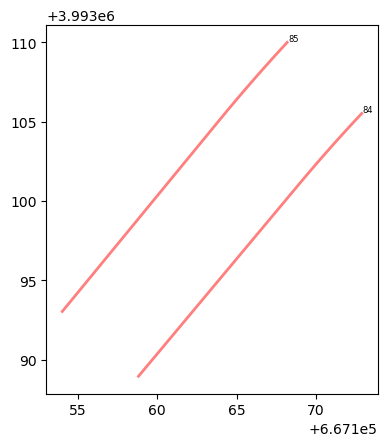

In [ ]:
for i, row in boundary_df.iterrows():
    if 86 > i > 83 :
        plot_line(row.geometry, color='red', alpha=0.5, add_points=False)
        plt.text(row.geometry.coords[0][0], row.geometry.coords[0][1], str(i), fontsize=6)
        plt.grid(False)

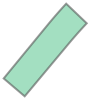

In [ ]:
line1 = boundary_df.geometry[85]
line2 = boundary_df.geometry[84]

shapely.Polygon(list(line2.coords) + list(line1.coords)[::-1])

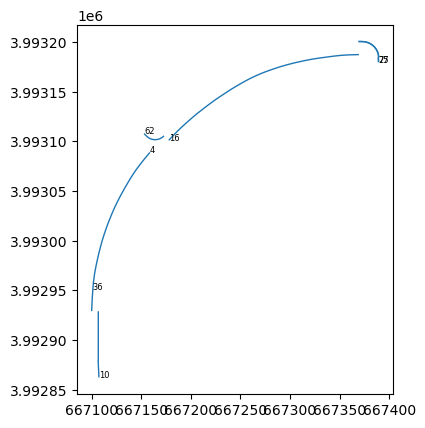

In [ ]:
#plot each boundary in boundary_df with label
for i, row in boundary_df.iterrows():
    
    if i == 4 or i == 10 or i == 62 or i == 36 or i == 25 or i == 16 or i == 77:
        plot_line(row.geometry, linewidth=1, add_points=False)
        plt.text(row.geometry.coords[0][0], row.geometry.coords[0][1], str(i), fontsize=6)
        # no grid
        plt.grid(False)

    